> # <b>Practical Lab 1 - Univariate Linear Regression <b>

#### **Prediction for California Housing Prices Dataset Using Linear regression**

> **Student Name**: Hasyashri Bhatt

>**Student ID**: 9028501

>**Course**: Foundations of Machine Learning Frameworks(CSCN8010) 

>**GitHub Repository**: https://github.com/Hasyashri/MLFramework_CSCN8010/tree/main/Assignment



> ## Introduction

In this Lab I will train first Machine Learning Model. There are multiple algorithms to train the model but here I will apply the `univariate linear regression`, which is a simple yet powerful algorithm that models the `relationship` between one `**independent variable**` and a `**dependent variable**` using a `linear equation: Y = mX + c`. <span style="font-size:10px">Refered from :https://github.com/CSCN8010/CSCN8010/tree/main/class_notebooks/linear_regression</span>

I will explore how the median house value varies with three different factors. The independent variables considered in this study are:
| Model | Independent Variable   | Description                  |
|-------|------------------------|------------------------------|
| 1     | Median Income          | Average income in the Dataset   |
| 2     | Population             | Total population  |
| 3     | Number of Households   | Count of households in the Dataset|


> # Step 1 : Framing the Problem
**Objective**
The objective of this lab is to develop and compare three univariate linear regression models to predict median house value. Each model uses a different independent variable: median income, population, and number of households. 

**Goal**
Through this analysis, I aim to identify which variable is the strongest predictor of housing prices and gain insights about it.I will train three separate models, each using a different feature as below:

1. Mean Squared Error (MSE)
2. Mean Absolute Error (MAE)
3. R² Score

> # Step 2 : Getting the Data

I have downloaded dataset from the below link and loaded in the Pandas.
**California Housing Prices Dataset Link**:https://www.kaggle.com/datasets/camnugent/california-housing-prices 

In [44]:
# Importing necessary libraries
import pandas as pd             # loading and manipulating data
import numpy as np              # numerical operations
import matplotlib.pyplot as plt # plotting
import seaborn as sns           # data visualization


**Load the dataset into the Panda Dataframe here I will initialize Dataframe as a df.**

In [45]:
# Load the dataset from a CSV file to a pandas DataFrame
df = pd.read_csv(r'C:\Users\habha\OneDrive\Desktop\Assignment Linear\Hasyashri-MLFramework_CSCN8010\Assignment\housing.csv')
# If it's loaded correctly, print successfully loaded message
if df is not None:
    print("Data loaded successfully.")

Data loaded successfully.


In [46]:
# Show the first few rows of the DataFrame
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [47]:
df.info()  # Display information about the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Check if there are any missing Values**

In [52]:
df.isnull().sum()  # Check for missing values in each column

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [49]:
df.shape  # Get the shape of the DataFrame (rows, columns)

(20640, 10)

**After Checking the Dataset I get to know that there are missing values in the total_bedroom column.I need fill this missing values in the Dataset. For that I am using fillna() method.**

In [54]:
# Fill missing values in 'total_bedrooms' column with the median value of that column
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())


In [56]:
# Verify that there are no more missing values in 'total_bedrooms'
print("Missing values in 'total_bedrooms':", df['total_bedrooms'].isnull().sum())

Missing values in 'total_bedrooms': 0


Before there are missing values:`207` present in the `total_bedrooms` column, now after using median of the column I filled the missing values in the `total_bedroom`column using fillna() method which resulted in: `Missing values in 'total_bedrooms': 0`.

Now going to check if there are any duplicated rows are present above we checked total rows and columns of the dataset using `.shape` which is (20640, 10).

In [61]:
# check for duplicates in the DataFrame
df.duplicated().sum()  # Count the number of duplicate rows

0

There are no duplicate rows or data present in the Dataset as it shows 0 as result.

> # Step 3 : Exploratory Data Analysis

>#### Task 1. Explore statistics (e.g., using Pandas `describe` function)

In [62]:
df.describe()  # Get a statistical summary of the DataFrame

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


>#### Task 2. Create three Seaborn scatter plots :
 - median house value vs. median income
 - population vs median house value 
 - households vs median house value 

Here, median_house_value is a Dependant Variable.

### Scatter Plot 1: median house value vs. median income

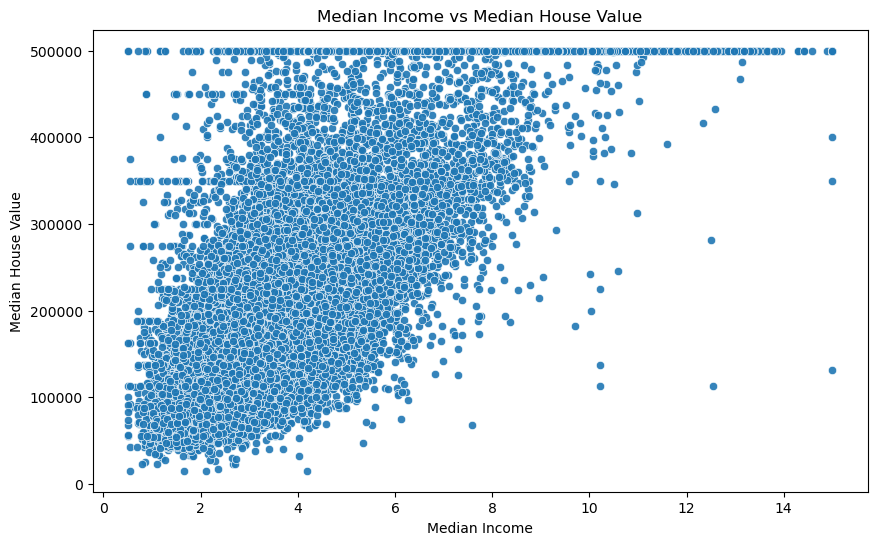

In [80]:
# Create scatter plot to visualize the relationship between 'median_income' and 'median_house_value'
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='median_income', y='median_house_value', alpha=0.9)  # Use alpha for transparency to better visualize overlapping points
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income') 
plt.ylabel('Median House Value')
plt.show()  # Display the plot

**Median Income vs Median House Value:**

Here, I observed that above graph shows a strong positive linear trend. According to graph,we can see that when income go high, house prices also go high. This makes sense because people who earn more can usually buy more expensive houses. This variable is highly predictive of house price. So, It is ideal for our linear regression. 

 ### Scatter Plot 2: population vs median house value

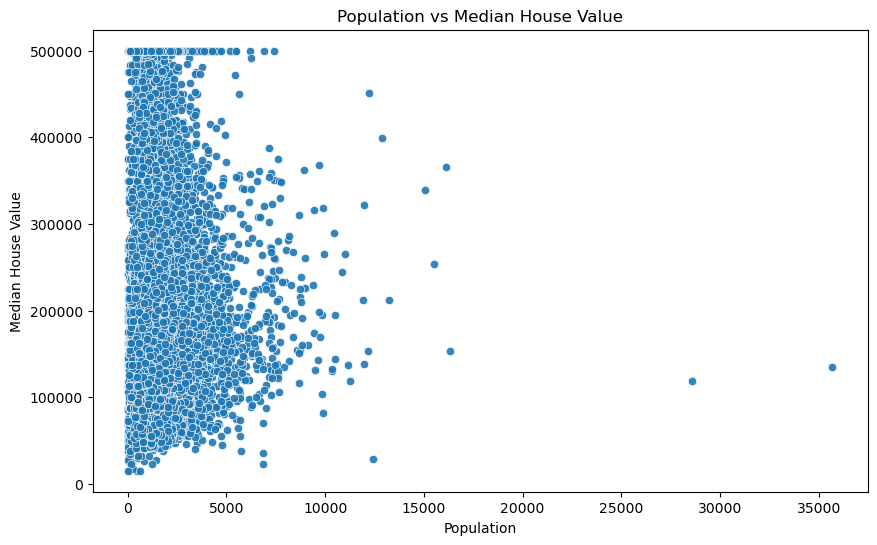

In [76]:
# Create scatter plot to visualize the relationship between 'population' and 'median_house_value'
plt.figure(figsize=(10, 6)) 
sns.scatterplot(df, x='population', y='median_house_value', alpha=0.9)  # Use alpha for transparency to better visualize overlapping points
plt.title('Population vs Median House Value')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()  # Display the plot

**Population Vs. Median House value :**

In this plot we can see that values are highly scattered and it shows no clear treand. It does not making any sense with the population. So, I do not find it that much relevant to each other.So, it is not a good fit for the linear regression.

### Scatter Plot 3: households vs median house value

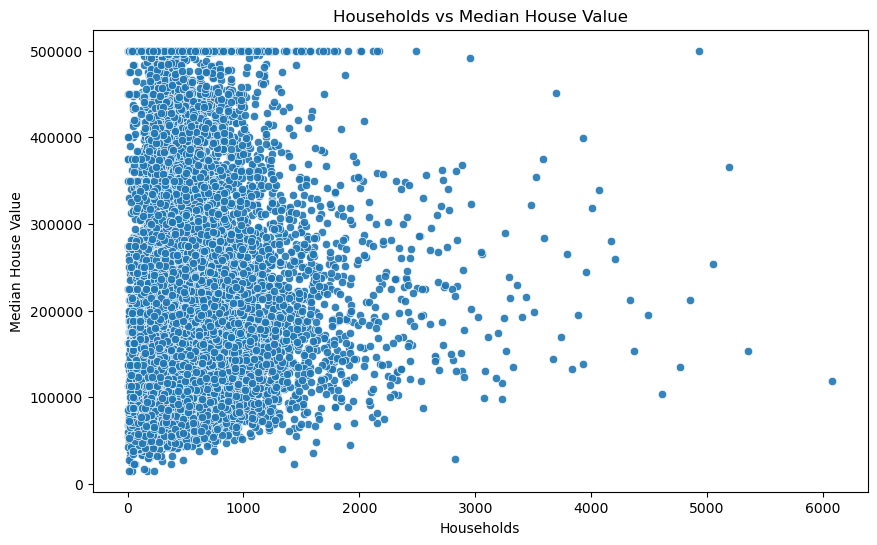

In [77]:
# Create a Scatter plot to visualize the relationshio between 'household' and 'median_house_value'
plt.figure(figsize=(10, 6))
sns.scatterplot(df, x='households', y='median_house_value', alpha=0.9)  # Use alpha for transparency to better visualize overlapping points
plt.title('Households vs Median House Value')
plt.xlabel('Households')
plt.ylabel('Median House Value')
plt.show()  # Display the plot

**Households Vs. Median House Values**

It also shows that values are scattered.This plot also does not shows any strong relationship between households and house values.So it is not a good fit.

> ### Task 3 : Description of the 4 variables used in this lab

I used Chatgpt to create the table pattern.

| **Variable**         | **Type**                 | **What It Means**                                  | **Typical Range**           | **Observation**                                                                                    |
| -------------------- | ------------------------ | -------------------------------------------------- | --------------------------- | -------------------------------------------------------------------------------------------------- |
| `median_house_value` | **Dependent Variable**   | Average house price in a housing block             | $15,000 to **\$500,001** | This is the target variable. Maximum Values are capped at $500K, which may limit accuracy at high prices. |
| `median_income`      | **Independent Variable** | Median income of households | 0.5 to **15**             | Strong positive relationship with house value. Best predictor for price.                           |
| `population`         | **Independent Variable** | Total number of people in each block               | A few to **35,000+**        | Highly variable with no clear pattern. Weak predictor alone.                                       |
| `households`         | **Independent Variable** | Number of occupied housing units                   | 1 to **6,000+**           | Weak positive trend with house price. Useful in combination with other variables.                  |


> # Step 4 : Run three linear regressions (fitting) :
- Median house value vs. median income
- Median house value vs. population
- Median house value vs. number of households.

Used Mean Square Error for the linear regression.<span style="font-size:10px">https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html</span>https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target
X_income = df[['median_income']] #x input Variable
X_population = df[['population']] 
X_households = df[['households']]
y = df['median_house_value'] # target (output) Variable

# Create the linear regression model
model = LinearRegression()

# 1. Median House Value vs. Median Income
model.fit(X_income, y)
y_pred_income = model.predict(X_income)

# 2. Median House Value vs. Population
model.fit(X_population, y)
y_pred_population = model.predict(X_population)

# 3. Median House Value vs. Number of Households
model.fit(X_households, y)
y_pred_households = model.predict(X_households)

print("Successfully run the Linear regression for 3 model")


Successfully run the Linear regression for 3 model


># Step 5 :Linear regressions `result` for each model in a table 
- Intercept and slope 
- Mean Squared Error 
- Mean Absolute Error 


In [94]:
# creating Table to display results of linear regression
results = pd.DataFrame({ 
    'Model': [
        'Median Income', 
        'Population', 
        'Households'
    ],
    'Intercept': [
        income_intercept:=model.intercept_, 
        pop_intercept:=model.intercept_, 
        house_intercept:=model.intercept_
    ],
    'Slope': [
        income_coef:= model.coef_[0], 
        pop_coef:= model.coef_[0], 
        house_coef:= model.coef_[0]
    ],
    'MSE': [
        income_mse:= mean_squared_error(y, y_pred_income), 
        pop_mse:= mean_squared_error(y, y_pred_population), 
        house_mse:= mean_squared_error(y, y_pred_households)
    ],
    'MAE': [
        income_mae:= mean_absolute_error(y, y_pred_income), 
        pop_mae:= mean_absolute_error(y, y_pred_population), 
        house_mae:= mean_absolute_error(y, y_pred_households)
    ],
    'R2 Score': [
        income_r2:= r2_score(y, y_pred_income), 
        pop_r2:= r2_score(y, y_pred_population), 
        house_r2:=r2_score(y, y_pred_households)
    ]
})

results

,Model,Intercept,Slope,MSE,MAE,R2 Score
0,Median Income,196928.577162,19.872775,7.011312e+09,62625.933791,0.473447
1,Population,196928.577162,19.872775,1.330741e+10,91153.820095,0.000608
2,Households,196928.577162,19.872775,1.325778e+10,90802.743243,0.004335


># Step 6: Visualization of the Linear regression results for each model


### **1. Median House Value vs. Median Income**

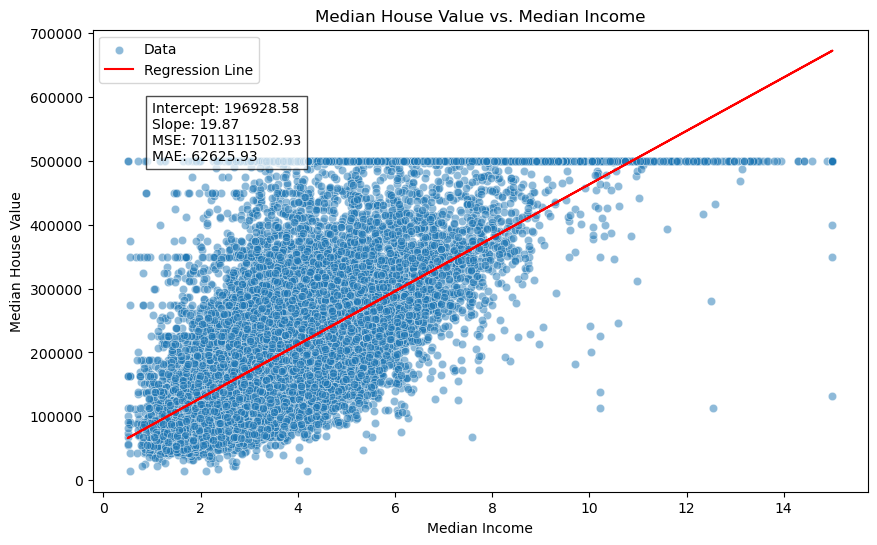

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['median_income'], y=df['median_house_value'], alpha=0.5, label='Data')
plt.plot(df['median_income'], y_pred_income, color='red', label='Regression Line')
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.text(
    1, 500000,
    f'Intercept: {income_intercept:.2f}\nSlope: {income_coef:.2f}\nMSE: {income_mse:.2f}\nMAE: {income_mae:.2f}',
    bbox=dict(facecolor='white', alpha=0.7)

    )
plt.show()

### **2. Median House Value vs. Population**

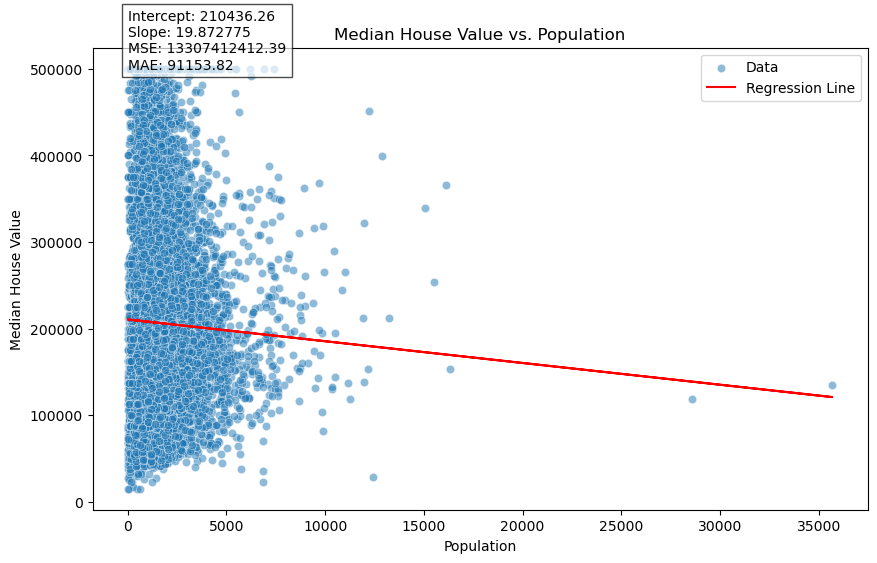

In [99]:
model_population = LinearRegression()
model_population.fit(X_population, y)
y_pred_population = model_population.predict(X_population)
pop_intercept = model_population.intercept_
pop_slope = model_population.coef_[0]
pop_mse = mean_squared_error(y, y_pred_population)
pop_mae = mean_absolute_error(y, y_pred_population)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['population'], y=df['median_house_value'], alpha=0.5, label='Data')
plt.plot(df['population'], y_pred_population, color='red', label='Regression Line')
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.legend()
plt.text(
    df['population'].min(), 500000,
    f'Intercept: {pop_intercept:.2f}\nSlope: {pop_coef:.6f}\nMSE: {pop_mse:.2f}\nMAE: {pop_mae:.2f}',
    bbox=dict(facecolor='white', alpha=0.7)
)
plt.show()


### **3. Median House Value vs. Number of Households**

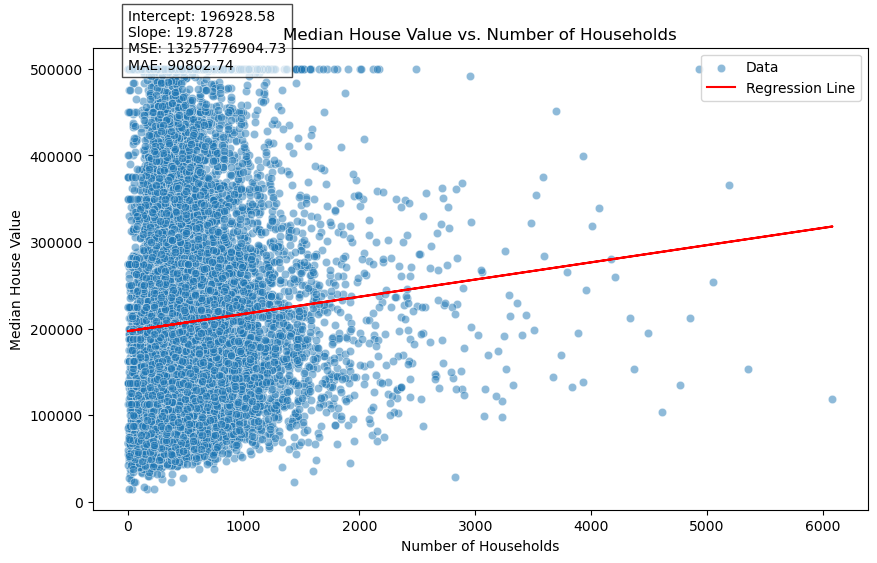

In [98]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['households'], y=df['median_house_value'], alpha=0.5, label='Data')
plt.plot(df['households'], y_pred_households, color='red', label='Regression Line')
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.legend()
plt.text(
    df['households'].min(), 500000,
    f'Intercept: {house_intercept:.2f}\nSlope: { house_coef:.4f}\nMSE: {house_mse:.2f}\nMAE: {house_mae:.2f}',
    bbox=dict(facecolor='white', alpha=0.7)
)
plt.show()

># Step 7: Summary


>**Summary of all model**

`Best performing model`: The regression between Median Income and Median House Value had the lowest MSE and MAE, indicating the best fit.

`Weakest model`: The model using Population as a predictor had the highest MSE and MAE, and its slope was nearly zero, suggesting that population size does not strongly predict house value.

`Households model`: Performed moderately, better than population but not as strong as income.

>**Insights:**

Median income has a strong positive correlation with house values — as income rises, housing prices also increase.

Population does not directly predict house value, perhaps due to other moderating factors.

Number of households has a small positive effect, which might reflect housing demand but not strongly enough to be a good predictor on its own